In [2]:
from sklearn.datasets import make_circles
n_samples=1000
x,y=make_circles(n_samples,noise=0.03,random_state=42)

In [3]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [5]:
import pandas as pd
circles=pd.DataFrame({'x0':x[:,0],'x1':x[:,1],'label':y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


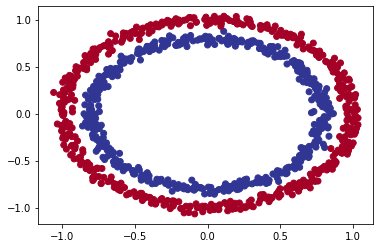

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)

In [7]:
x.shape,y.shape

((1000, 2), (1000,))

In [1]:
import tensorflow as tf

In [10]:
tf.random.set_seed(42)

model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.SGD(),metrics=['accuracy'])

model_1.fit(x,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1000us/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4820


In [11]:
model_1.fit(x,y,epochs=200,verbose=0)
model_1.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [15]:
tf.random.set_seed(42)

model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.SGD(),metrics=['accuracy'])

model_2.fit(x,y,epochs=100,verbose=0)

In [16]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
model_3.fit(x,y,epochs=100,verbose=0)

In [10]:
import numpy as np

def plot_decision_boundary(model,x,y):
    x_min,x_max=x[:,0].min()-0.1,x[:,0].max()+0.1
    y_min,y_max=x[:,1].min()-0.1,x[:,1].max()+0.1
    xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))
    
    x_in=np.c_[xx.ravel(),yy.ravel()]
    y_pred=model.predict(x_in)
    if len(y_pred[0])>1:
        y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
    else:
        y_pred=np.round(y_pred).reshape(xx.shape)
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(x[:,0],x[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())

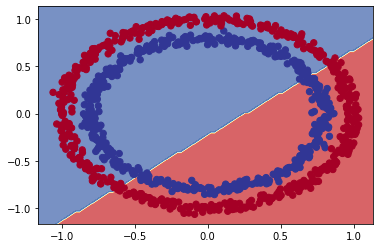

In [18]:
plot_decision_boundary(model=model_3,x=x,y=y)

In [7]:
tf.random.set_seed(42)

model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])
model_4.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9642 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8626 - accuracy: 0.4100
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8123 - accuracy: 0.4160
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7802 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7419 - accuracy: 0.4220
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.7214 - accuracy: 0.4830
Epoch 83/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7204 - accuracy: 0.4840
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7193 - accuracy: 0.4840
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7182 - accuracy: 0.4860
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7173 - accuracy: 0.4880
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7163 - accuracy: 0.4880
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7154 - accuracy: 0.4880
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7145 - accuracy: 0.4880
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7136 - accuracy: 0.4880
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7128 - accuracy: 0.4910
Epoch 92/100


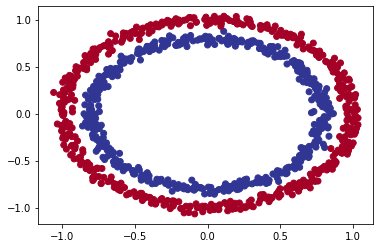

In [9]:
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)

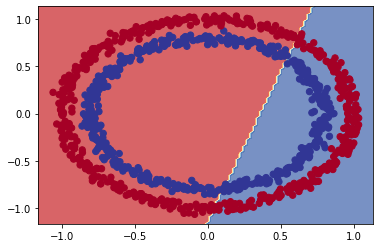

In [11]:
plot_decision_boundary(model=model_4,x=x,y=y)

In [12]:
tf.random.set_seed(42)

model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])

model_5.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])
model_5.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1000us/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 967us/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 935us/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 959us/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 967us/step - loss: 3.9642 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 935us/step - loss: 3.8626 - accuracy: 0.4100
Epoch 8/100
32/32 [==============================] - 0s 966us/step - loss: 3.8123 - accuracy: 0.4160
Epoch 9/100
32/32 [==============================] - 0s 935us/step - loss: 3.7802 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 967us/step - loss: 3.7419 - accurac

32/32 [==============================] - 0s 1ms/step - loss: 0.7226 - accuracy: 0.4830
Epoch 82/100
32/32 [==============================] - 0s 1000us/step - loss: 0.7214 - accuracy: 0.4830
Epoch 83/100
32/32 [==============================] - 0s 1000us/step - loss: 0.7204 - accuracy: 0.4840
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7193 - accuracy: 0.4840
Epoch 85/100
32/32 [==============================] - 0s 1000us/step - loss: 0.7182 - accuracy: 0.4860
Epoch 86/100
32/32 [==============================] - 0s 1000us/step - loss: 0.7173 - accuracy: 0.4880
Epoch 87/100
32/32 [==============================] - 0s 972us/step - loss: 0.7163 - accuracy: 0.4880
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7154 - accuracy: 0.4880
Epoch 89/100
32/32 [==============================] - ETA: 0s - loss: 0.7648 - accuracy: 0.46 - 0s 1ms/step - loss: 0.7145 - accuracy: 0.4880
Epoch 90/100
32/32 [==============================] - 0s 

In [13]:
tf.random.set_seed(42)

model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1)
])
model_6.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])
model_6.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 93/100


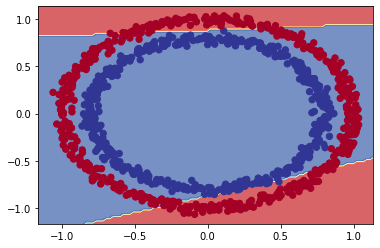

In [14]:
plot_decision_boundary(model=model_6,x=x,y=y)

In [15]:
tf.random.set_seed(42)

model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_7.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])
model_7.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.4456 - accuracy: 0.9580
Epoch 83/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4360 - accuracy: 0.9630
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4260 - accuracy: 0.9690
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4145 - accuracy: 0.9700
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4059 - accuracy: 0.9740
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3962 - accuracy: 0.9750
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3873 - accuracy: 0.9720
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3795 - accuracy: 0.9750
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3716 - accuracy: 0.9750
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3635 - accuracy: 0.9840
Epoch 92/100


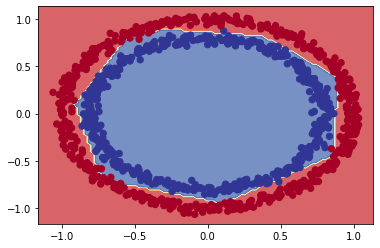

In [16]:
plot_decision_boundary(model=model_7,x=x,y=y)

In [17]:
A=tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

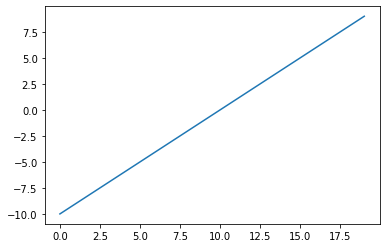

In [18]:
plt.plot(A)

In [19]:
def sigmoid(x):
    return 1/(1+tf.exp(-x))

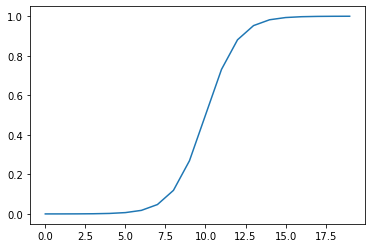

In [20]:
plt.plot(sigmoid(A))

In [23]:
def relu(x):
    return tf.maximum(0,x)
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

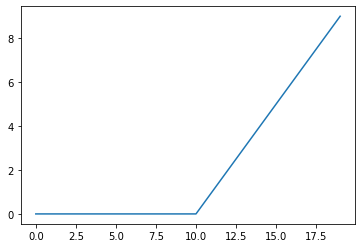

In [24]:
plt.plot(relu(A))

In [25]:
x_train,y_train=x[:800],y[:800]
x_test,y_test=x[800:],y[800:]

In [26]:
tf.random.set_seed(42)

model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_8.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(lr=0.01),
               metrics=['accuracy'])

history = model_8.fit(x_train,y_train,epochs=25)

l:\python3.9\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 958us/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 1000us/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25

In [27]:
model_8.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468849122524261, 1.0]

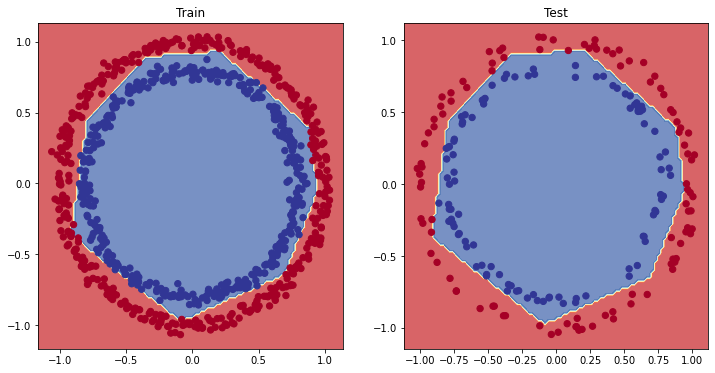

In [28]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_8,x_train,y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_8,x_test,y_test)
plt.show()

In [29]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'Model_8')

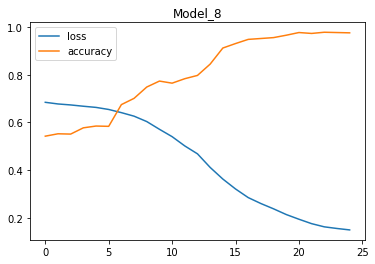

In [30]:
pd.DataFrame(history.history).plot()
plt.title('Model_8')

In [33]:
tf.random.set_seed(42)

model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_9.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

history_9=model_9.fit(x_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 1000us/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 958us/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 958us/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 958us/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 1000us/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.50

25/25 [==============================] - 0s 1ms/step - loss: 0.7120 - accuracy: 0.5412
Epoch 83/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7292 - accuracy: 0.4863
Epoch 84/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7098 - accuracy: 0.5013
Epoch 85/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7253 - accuracy: 0.5038
Epoch 86/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7775 - accuracy: 0.5063
Epoch 87/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7664 - accuracy: 0.5088
Epoch 88/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7562 - accuracy: 0.5213
Epoch 89/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7536 - accuracy: 0.4938
Epoch 90/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7802 - accuracy: 0.5238
Epoch 91/100
25/25 [==============================] - 0s 1ms/step - loss: 0.8129 - accuracy: 0.5213
Epoch 92/100


<AxesSubplot:xlabel='epochs'>

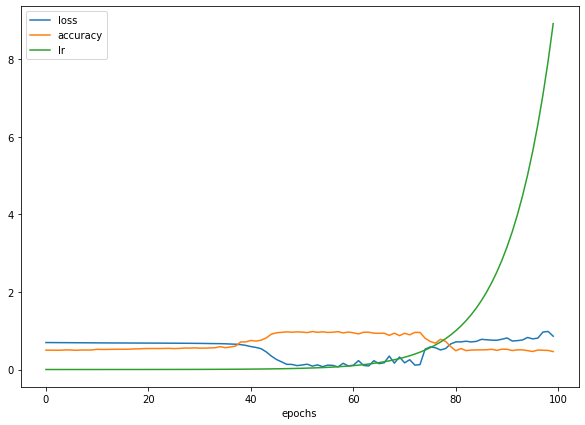

In [34]:
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel='epochs')

Text(0.5, 1.0, 'Learning Rate vs loss')

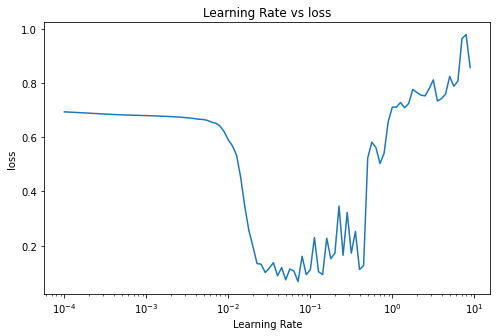

In [36]:
lrs=1e-4*(10**(tf.range(100)/20))
plt.figure(figsize=(8,5))
plt.semilogx(lrs,history_9.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('loss')
plt.title('Learning Rate vs loss')

In [40]:
tf.random.set_seed(42)

model_10=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_10.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(lr=0.08),metrics=['accuracy'])

history_10=model_10.fit(x_train,y_train,epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6832 - accuracy: 0.5475
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6321 - accuracy: 0.6313
Epoch 3/25
25/25 [==============================] - 0s 1000us/step - loss: 0.5046 - accuracy: 0.7812
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.2429 - accuracy: 0.9538
Epoch 5/25
25/25 [==============================] - 0s 1000us/step - loss: 0.1155 - accuracy: 0.9887
Epoch 6/25
25/25 [==============================] - 0s 967us/step - loss: 0.0769 - accuracy: 0.9925
Epoch 7/25
25/25 [==============================] - 0s 958us/step - loss: 0.0733 - accuracy: 0.9875
Epoch 8/25
25/25 [==============================] - 0s 916us/step - loss: 0.1755 - accuracy: 0.9337
Epoch 9/25
25/25 [==============================] - 0s 958us/step - loss: 0.1145 - accuracy: 0.9613
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9850
Epoch

In [41]:
model_10.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0271 - accuracy: 0.9950


[0.027052607387304306, 0.9950000047683716]

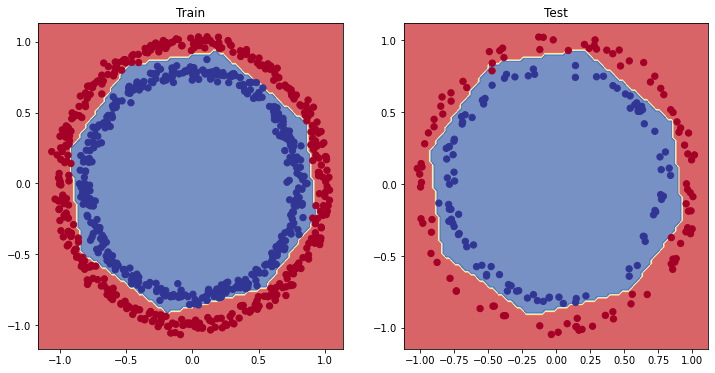

In [42]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_10,x_train,y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_10,x_test,y_test)

In [43]:
from sklearn.metrics import confusion_matrix

In [45]:
y_preds=model_10.predict(x_test)
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [47]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [49]:
confusion_matrix(y_test,tf.round(y_preds))

array([[100,   1],
       [  0,  99]], dtype=int64)

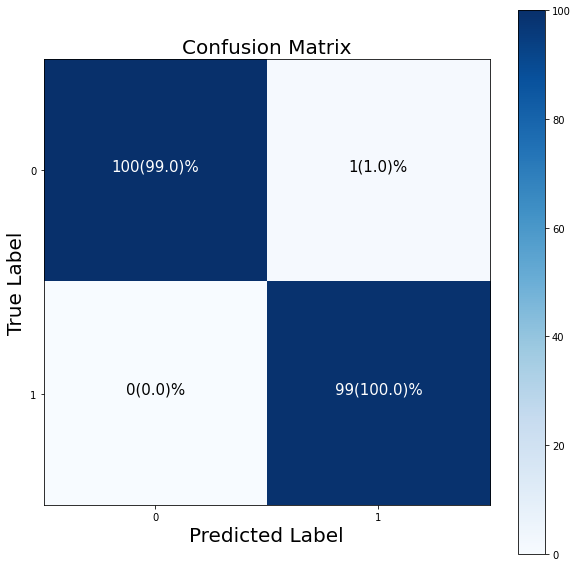

In [55]:
import itertools

figsize=(10,10)

cm=confusion_matrix(y_test,tf.round(y_preds))
cm_norm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
n_classes=cm.shape[0]

fig,ax=plt.subplots(figsize=figsize)
cax=ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)
classes=False
if classes:
    label=classes
else:
    label=np.arange(cm.shape[0])
ax.set(title='Confusion Matrix',xlabel='Predicted Label',ylabel='True Label',
      xticks=np.arange(n_classes),yticks=np.arange(n_classes),xticklabels=label,yticklabels=label)

ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

threshold=(cm.max()+cm.min())/2.

for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f'{cm[i,j]}({cm_norm[i,j]*100:.1f})%',horizontalalignment='center',
            color='white' if cm[i,j]>threshold else 'black',size=15)